## Praca domowa 6

W poniżej rozwiązanym zadaniu będę działać na zbiorze Olivetti Faces. 

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
from numpy.random import RandomState
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from statistics import mean

## 0. Przykładowe twarze

Zapoznajmy się na poczatek z naszym zbiorem.

In [169]:
faces = fetch_olivetti_faces()
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [170]:
images=faces.images
features=faces.data
targets=faces.target

In [171]:
faces_train=faces.data[:300]
faces_test=faces.data[300:]
faces_train

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.23553719, 0.35123968, 0.446281  , ..., 0.45454547, 0.45867768,
        0.46280992],
       [0.42975205, 0.45041323, 0.49586776, ..., 0.30578512, 0.2892562 ,
        0.3140496 ],
       [0.40495867, 0.45454547, 0.5       , ..., 0.74380165, 0.73140496,
        0.70247936]], dtype=float32)

Czyli nasz zbiór ma 400 obrazków, przykładowe pokazane poniżej.

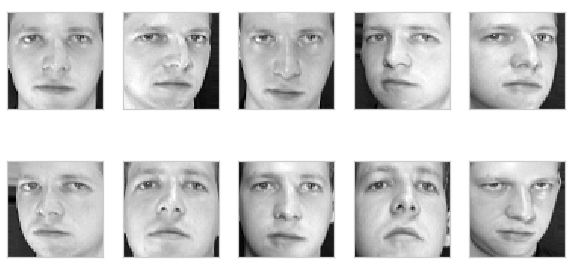

In [172]:
nrows, ncols = 2, 5
shape=(64,64)
plt.figure(figsize=(10,5))
plt.gray()
for i in range(ncols * nrows):
    first=faces_train[i]
    first_re=first.reshape(shape)
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(first_re)
    plt.xticks([]); plt.yticks([])
plt.show()

## 1. PCA

Text(0, 0.5, 'cumulative explained variance')

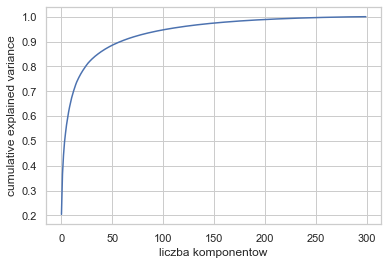

In [173]:
pca=PCA().fit(faces_train.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('liczba komponentow')
plt.ylabel('cumulative explained variance')

In [174]:
pca=PCA(n_components=0.98)
pca.fit(faces_train)
x= pca.transform(faces_train)
x.shape[1]

168

Liczba komponentów równa 168 zapewni nam 98% zachowanych informacji o zbiorze.

Obliczmy w takim razie stopień kompresji w takim przypadku. Jest on dość znaczny.

In [175]:
CR=4096/168
CR

24.38095238095238

## 2. Transformacja odwrotna

In [176]:
faces_inversed=pca.inverse_transform(x)

In [177]:
first=faces_train[1]
shape=(64,64)
first_re=first.reshape(shape)

faces_inv_re=faces_inversed[1].reshape(shape)


Narysowana przykładowa obserwacja przed (po lewej) i po (po prawej) kompresji PCA. Widać różnicę w jakości, jednak nie jest ona aż tak znaczna.

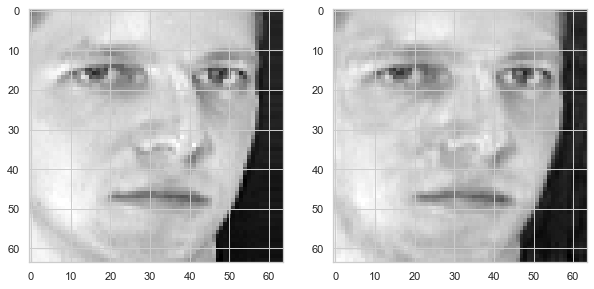

In [178]:
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)
ax1.imshow(first_re)
ax2=fig.add_subplot(1,2,2)
ax2.imshow(faces_inv_re)

Poniżej porównanie 10 obrazków przed (wyżej) i po kompresji (niżej).

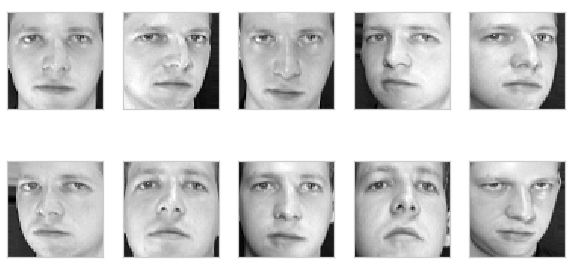

In [179]:
nrows, ncols = 2, 5
shape=(64,64)
plt.figure(figsize=(10,5))
plt.gray()
for i in range(ncols * nrows):
    first=faces_train[i]
    first_re=first.reshape(shape)
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(first_re)
    plt.xticks([]); plt.yticks([])
plt.show()

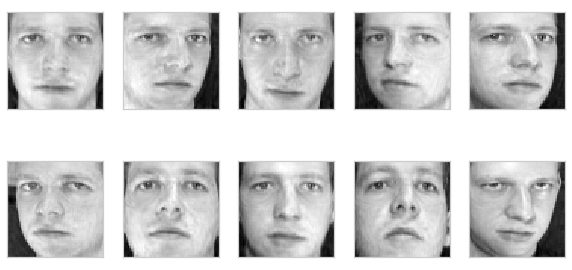

In [180]:
nrows, ncols = 2, 5
shape=(64,64)
plt.figure(figsize=(10,5))
plt.gray()
for i in range(ncols * nrows):
    first=faces_inversed[i]
    first_re=first.reshape(shape)
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(first_re)
    plt.xticks([]); plt.yticks([])
plt.show()

### Błąd RMSE

Policzmy błąd RMSE dla każdego z obrazów oraz średnią tych błędów. Następnie stworzymy boxplota dla wszystkich RMSE.

In [181]:
rmse_score=[0 for i in range(300)]
for i in range(300):
    rmse_score[i]= mean_squared_error(faces_train[i], faces_inversed[i])
mean(rmse_score)

0.0003518315

C:\Users\akaga\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

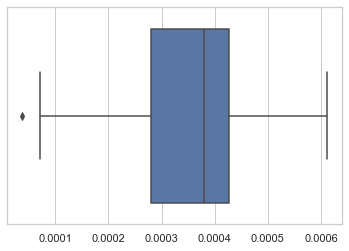

In [182]:
sns.set_theme(style="whitegrid")
sns.boxplot(rmse_score)

Jak widać powyżej błąd ten nie jest znaczny.

## 3. Modyfikacja obrazów

Obrócone o 90 stopni:

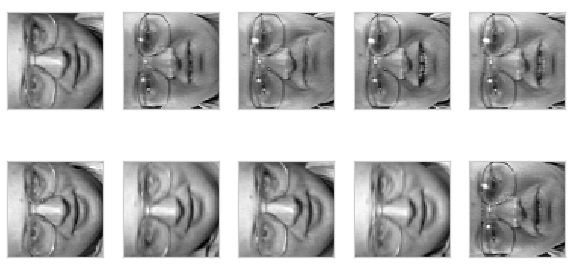

In [183]:
plt.figure(figsize=(10,5))
plt.gray()
rotated=[0 for i in range(25)]
for i in range(25):
    rotated[i]=faces_test[i].reshape(shape).transpose().reshape(4096)


for i in range(ncols * nrows):
    first=rotated[i]
    first_re=first.reshape(shape)
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(first_re)
    plt.xticks([]); plt.yticks([])
plt.show()

Przyciemnione:

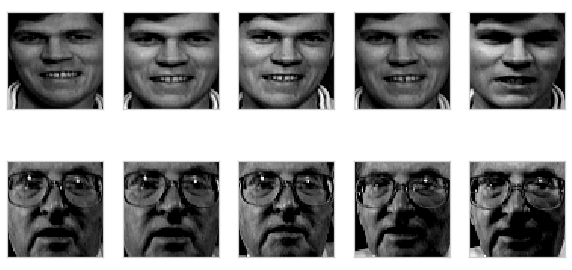

In [184]:
plt.figure(figsize=(10,5))
dark=np.ndarray((25,4096), float)
for i in range(25,50):
    for j in range(faces_test[i].shape[0]):
        dark[i-25][j]=max(1, faces_test[i][j]+0.7)


for k in range(ncols * nrows):
    first=dark[k]
    first_re=first.reshape(shape)
    ax = plt.subplot(nrows, ncols, k + 1)
    ax.matshow(first_re)
    plt.xticks([]); plt.yticks([])
plt.show()

## 4. Transformacja i odwrotna transformacja dla przekształconych danych

In [185]:
transformed_rotated= pca.transform(rotated)
faces_inversed_r=pca.inverse_transform(transformed_rotated)

rmse_score_r=[0 for i in range(25)]
for i in range(25):
    rmse_score_r[i]= mean_squared_error(rotated[i], faces_inversed_r[i])
mean(rmse_score_r)


0.007929580092292351

In [186]:

transformed_dark= pca.transform(dark)
faces_inversed_d=pca.inverse_transform(transformed_dark)

rmse_score_d=[0 for i in range(25)]
for i in range(25):
    rmse_score_d[i]= mean_squared_error(dark[i], faces_inversed_d[i])
mean(rmse_score_d)

0.006535523051000984

Porównanie z błędami wcześniejszymi.

<AxesSubplot:>

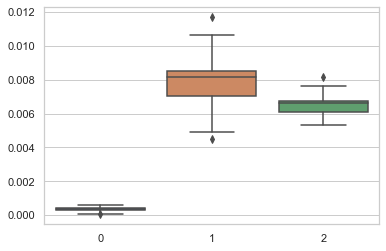

In [187]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=[rmse_score, rmse_score_r, rmse_score_d])

## Podsumowanie

Jak widać dużo większy błąd RMSE jest dla danych zmienionych - dla obrotu oraz przyciemnienia. Z tego powodu można spróbować wykorzystać powyżej przedstawioną metodę, by rozpoznawać np czy jakieś zdjęcie zostało poddane obróbce czy pozostało niezmienione. Jednak ta metoda może nie byc skuteczna, gdybyśmy delikatnie zmieniali dane - nieznacznie przyciemniali/ rozjaśniali zdjęcie czy obracali je tylko delikatnie.
